In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import pymc3 as pm
import arviz as az
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%matplotlib inline
from IPython.display import Math, Latex

Probabilities are used to measure the uncertainty we have about parameters, and Bayes' theorem is the mechanism to correctly update those probabilities in light of new data, hopefully reducing our uncertainty.Now that we know what Bayesian statistics is, let's learn how to do Bayesian statistics with a simple example. We are going to begin inferring a single, unknown parameter.

The coin-flipping problem, or the beta-binomial model if you want to sound fancy at parties, is a classical problem in statistics and goes like this: we toss a coin a number of times and record how many heads and tails we get. Based on this data, we try to answer questions such as, is the coin fair? Or, more generally, how biased is the coin?

In [6]:
np.random.seed(123)
trials = 4
theta_real = 0.35 # unknown value in a real experiment
data = stats.bernoulli.rvs(p=theta_real, size=trials)
data

array([1, 0, 0, 0])

If we know the value of theta, the binomial distribution will tell us the expected distribution of heads. The only problem is that we do not know  theta! In Bayesian statistics, every time we do not know the value of a parameter, we put a prior on it, in this case the prior for theta is a beta.  This give us:

In [15]:
display(Math(r'\theta \sim Beta(\alpha,\beta)'))
display(Math(r'y \sim Binomial(n-1,p=\theta)'))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

This bit of code creates the model and then presses the 'inference button' - the inference button is trace = pm.sample... everything else is the model.

In [22]:
with pm.Model() as our_first_model:
    θ = pm.Beta('θ', alpha=1., beta=1.)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(5000, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:03<00:00, 5597.33draws/s]


## Summarizing the posterior
Generally, the first task we will perform after sampling from the posterior is check what the results look like. The plot_trace function from ArviZ is ideally suited to this task:

/Users/m102417/anaconda3/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


<MultiTrace: 4 chains, 5000 iterations, 2 variables>

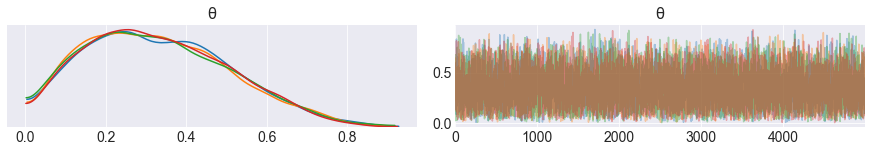

In [23]:
az.plot_trace(trace)
trace

On the left, we have a Kernel Density Estimation (KDE) plot; this is like the smooth version of the histogram. On the right, we get the individual sampled values at each step during the sampling. From the trace plot, we can visually get the plausible values from the posterior.

In [24]:
# get a numerical summary of the trace
az.summary(trace)

/Users/m102417/anaconda3/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


,mean,sd,mcse_mean,mcse_sd,hpd_3%,hpd_97%,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
θ,0.334,0.177,0.002,0.001,0.028,0.648,8466.0,8466.0,8212.0,10188.0,1.0


Another way to visually summarize the posterior is to use the plot_posterior function that comes with ArviZ. We have already used this distribution in the previous chapter for a fake posterior. We are going to use it now for a real posterior. By default, plot_posterior shows a histogram for discrete variables and KDEs for continuous variables. We also get the mean of the distribution (we can ask for the median or mode using the point_estimate argument) and the 94% HPD as a black line at the bottom of the plot. Different interval values can be set for the HPD with the credible_interval argument. This type of plot was introduced by John K. Kruschke in his great book Doing Bayesian Data Analysis

/Users/m102417/anaconda3/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c24b81198>],
      dtype=object)

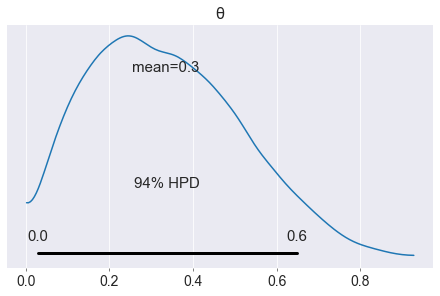

In [25]:
az.plot_posterior(trace)

/Users/m102417/anaconda3/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x110ce5080>],
      dtype=object)

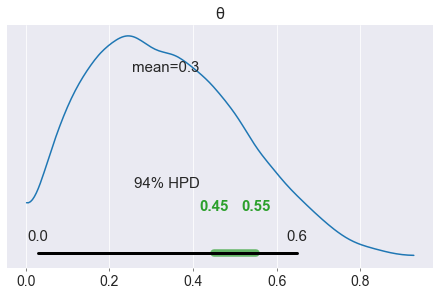

In [26]:
#Adding ROPE (Region Of Practical Equivalence) looks like this (green)
az.plot_posterior(trace, rope=[0.45, .55])

/Users/m102417/anaconda3/lib/python3.6/site-packages/arviz/data/io_pymc3.py:56: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  chain_likelihoods.append(np.stack(log_like))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2454bba8>],
      dtype=object)

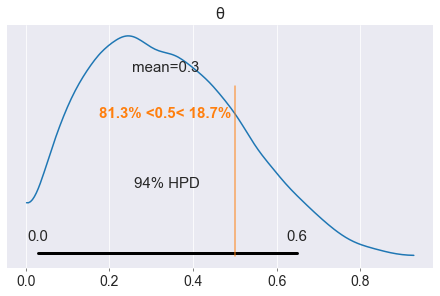

In [27]:
# plotting reference values along the posterior
az.plot_posterior(trace, ref_val=0.5) 